Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB

First few rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      NaN           72.0           35.0      0.0   NaN   
1          1.0     85.0           66.0           29.0      0.0   

C:\Users\tuf\AppData\Local\Temp\ipykernel_10064\2216467388.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mode_imputed[column].fillna(data_mode_imputed[column].mode()[0], inplace=True)
C:\Users\tuf\AppData\Local\Temp\ipykernel_10064\2216467388.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

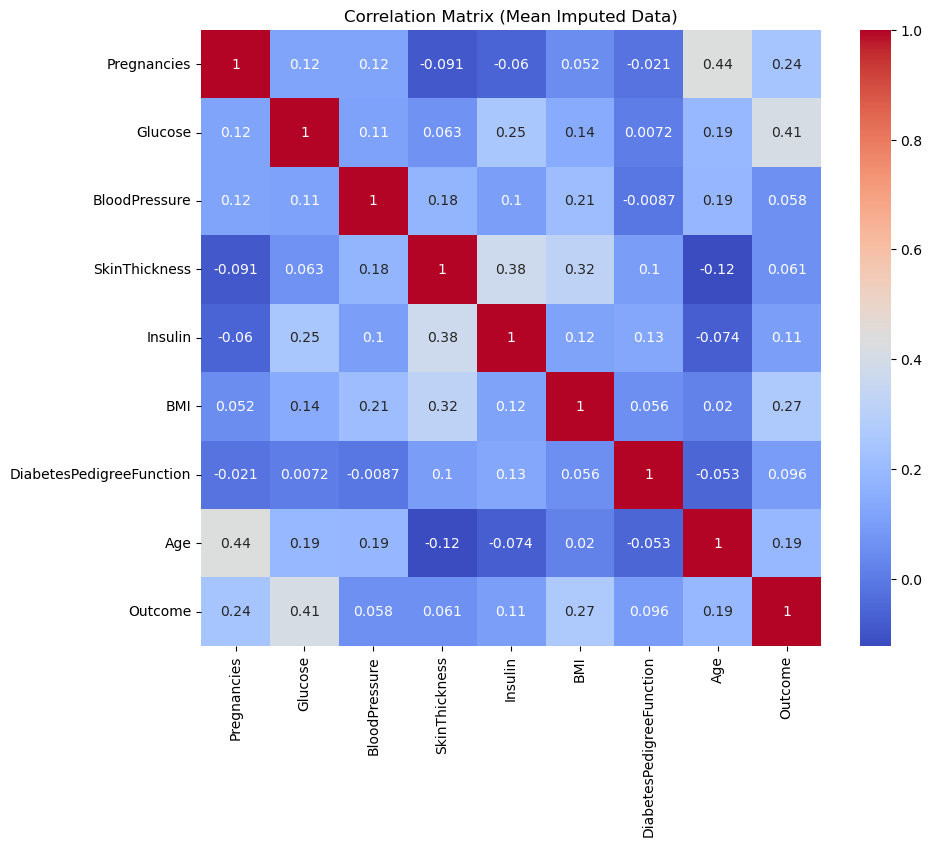

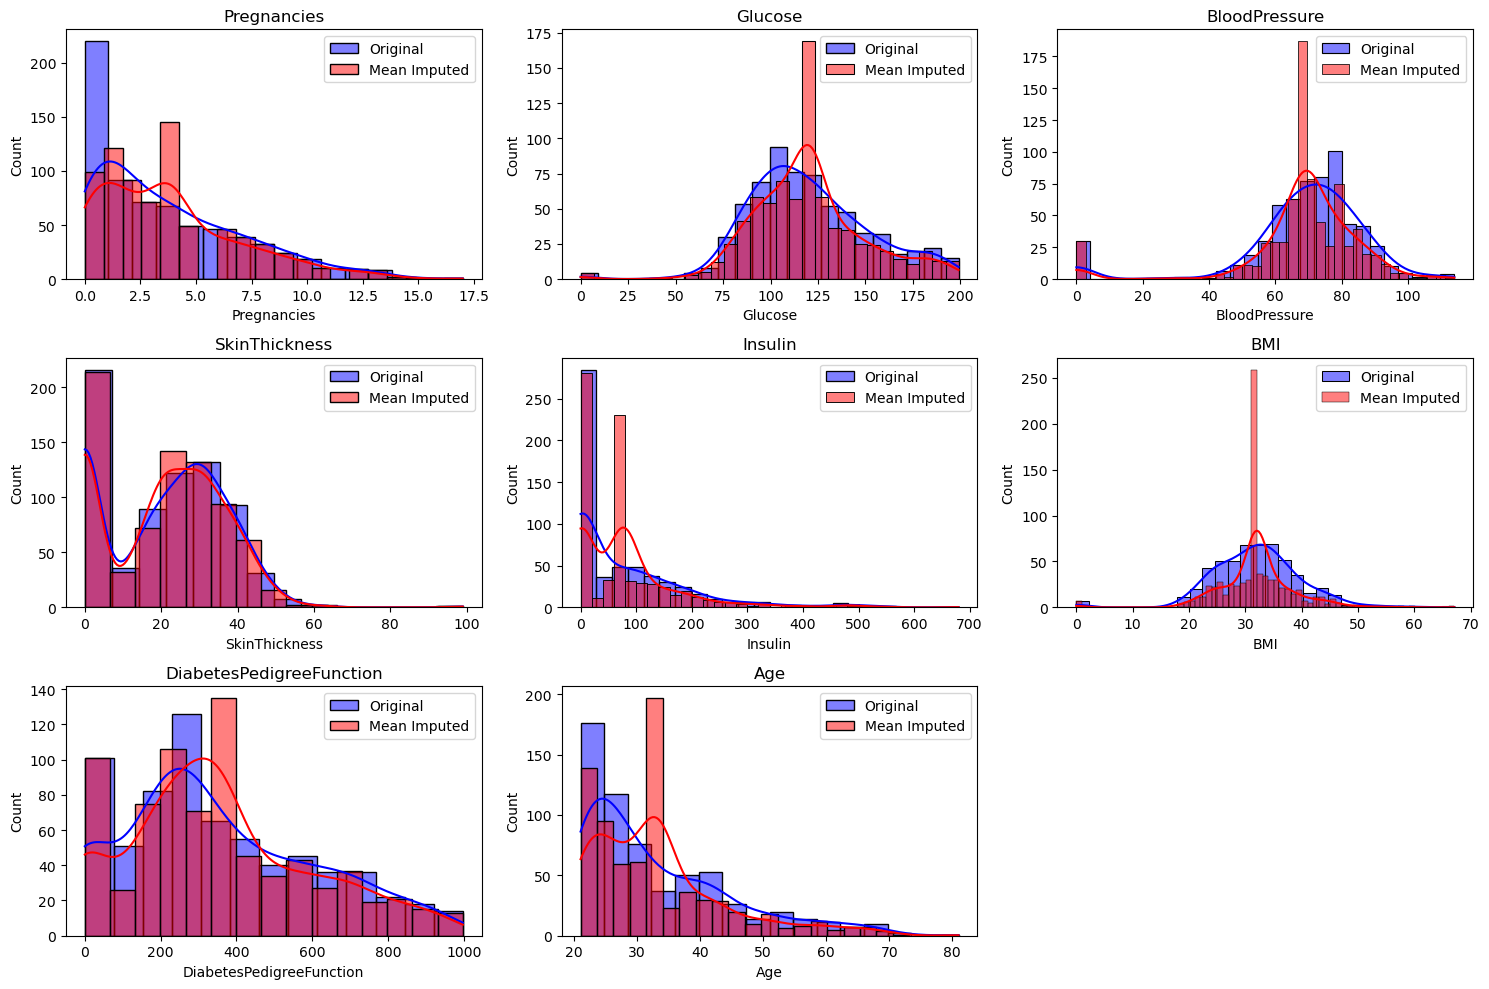

In [10]:
# Nomor 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'diabetes.csv'  
diabetes_data = pd.read_csv(file_path)

print("Dataset Info:")
diabetes_data.info()
print("\nFirst few rows:")
print(diabetes_data.head())

def impute_missing_values(data):
    data_mean_imputed = data.copy()
    data_mean_imputed.fillna(data.mean(), inplace=True)
    
    data_median_imputed = data.copy()
    data_median_imputed.fillna(data.median(), inplace=True)
    
    data_mode_imputed = data.copy()
    for column in data_mode_imputed.columns:
        data_mode_imputed[column].fillna(data_mode_imputed[column].mode()[0], inplace=True)
    
    return data_mean_imputed, data_median_imputed, data_mode_imputed

mean_imputed, median_imputed, mode_imputed = impute_missing_values(diabetes_data)

print("\nMean Imputed Data:")
print(mean_imputed.head())
print("\nMedian Imputed Data:")
print(median_imputed.head())
print("\nMode Imputed Data:")
print(mode_imputed.head())

# Visualizations

plt.figure(figsize=(10,8))
sns.heatmap(mean_imputed.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix (Mean Imputed Data)')
plt.show()

plt.figure(figsize=(15,10))
for i, column in enumerate(diabetes_data.columns[:-1], 1):  # Exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_data[column], color='blue', label='Original', kde=True, alpha=0.5)
    sns.histplot(mean_imputed[column], color='red', label='Mean Imputed', kde=True, alpha=0.5)
    plt.title(column)
    plt.legend()

plt.tight_layout()
plt.show()


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.119459       0.119416      -0.090596   
Glucose                      0.119459  1.000000       0.112033       0.062890   
BloodPressure                0.119416  0.112033       1.000000       0.178054   
SkinThickness               -0.090596  0.062890       0.178054       1.000000   
Insulin                     -0.060384  0.247402       0.103640       0.375302   
BMI                          0.052053  0.141139       0.207682       0.318749   
DiabetesPedigreeFunction    -0.021198  0.007221      -0.008726       0.100646   
Age                          0.437182  0.191740       0.188462      -0.122166   
Outcome                      0.238629  0.411253       0.057655       0.061280   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.060384  0.052053                 -0.021198   
Glucose              

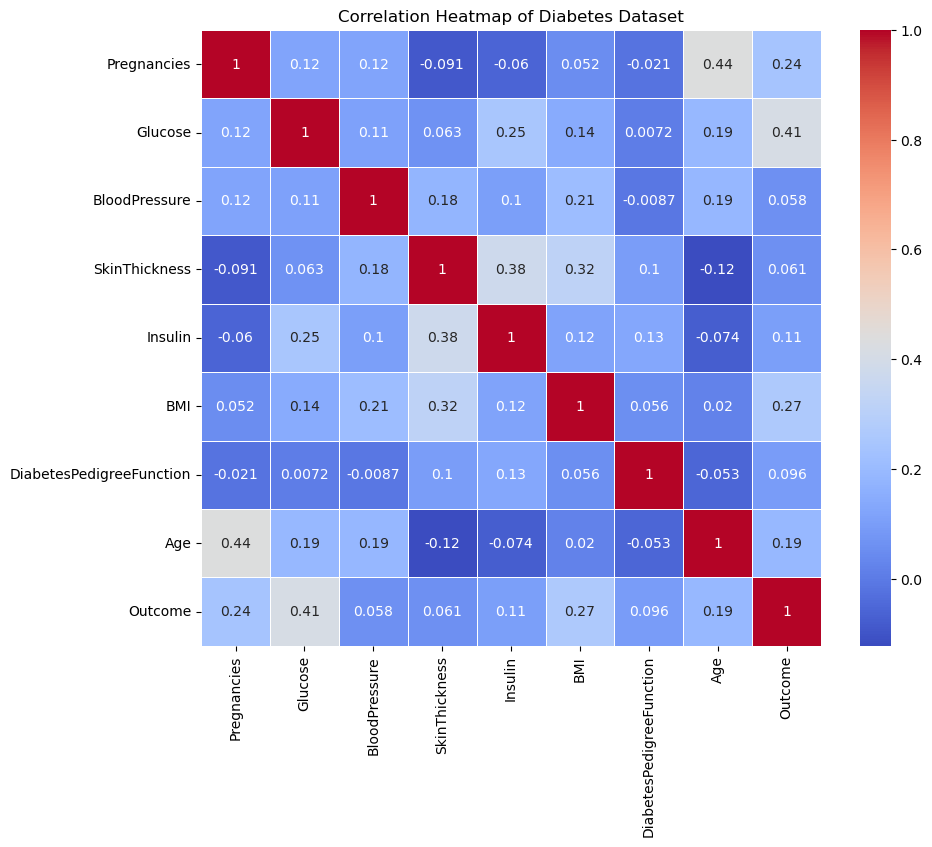

In [12]:
# Nomor 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'diabetes.csv'  
diabetes_data = pd.read_csv(file_path)

diabetes_data.fillna(diabetes_data.mean(), inplace=True)

correlation_matrix = diabetes_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()


Class distribution before undersampling:
Outcome
0    500
1    268
Name: count, dtype: int64

Class distribution after undersampling:
Outcome
0    268
1    268
Name: count, dtype: int64


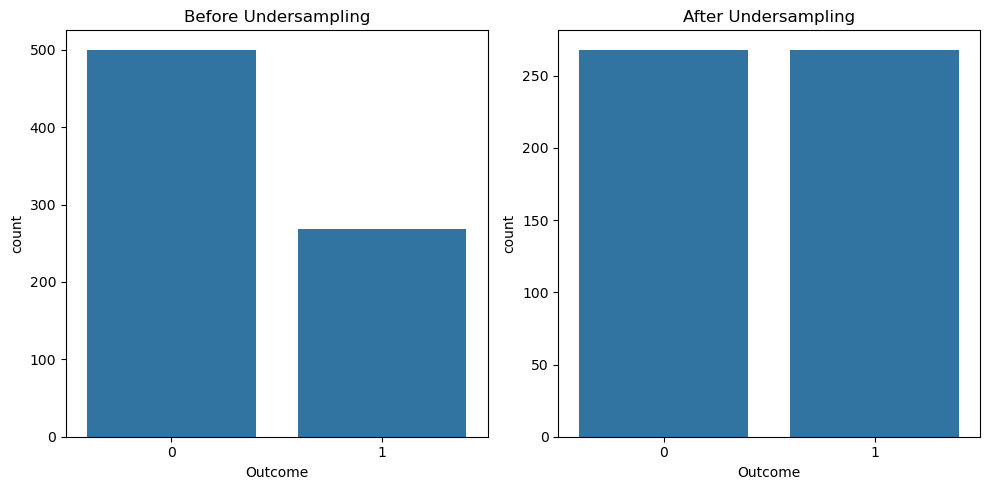

In [14]:
# Nomor 3
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'diabetes.csv'  
diabetes_data = pd.read_csv(file_path)

diabetes_data.fillna(diabetes_data.mean(), inplace=True)

print("Class distribution before undersampling:")
print(diabetes_data['Outcome'].value_counts())

majority_class = diabetes_data[diabetes_data['Outcome'] == 0]
minority_class = diabetes_data[diabetes_data['Outcome'] == 1]

majority_class_undersampled = resample(majority_class, 
                                       replace=False,  
                                       n_samples=len(minority_class),  
                                       random_state=42)

balanced_data = pd.concat([majority_class_undersampled, minority_class])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nClass distribution after undersampling:")
print(balanced_data['Outcome'].value_counts())

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.countplot(x='Outcome', data=diabetes_data)
plt.title("Before Undersampling")

plt.subplot(1, 2, 2)
sns.countplot(x='Outcome', data=balanced_data)
plt.title("After Undersampling")

plt.tight_layout()
plt.show()


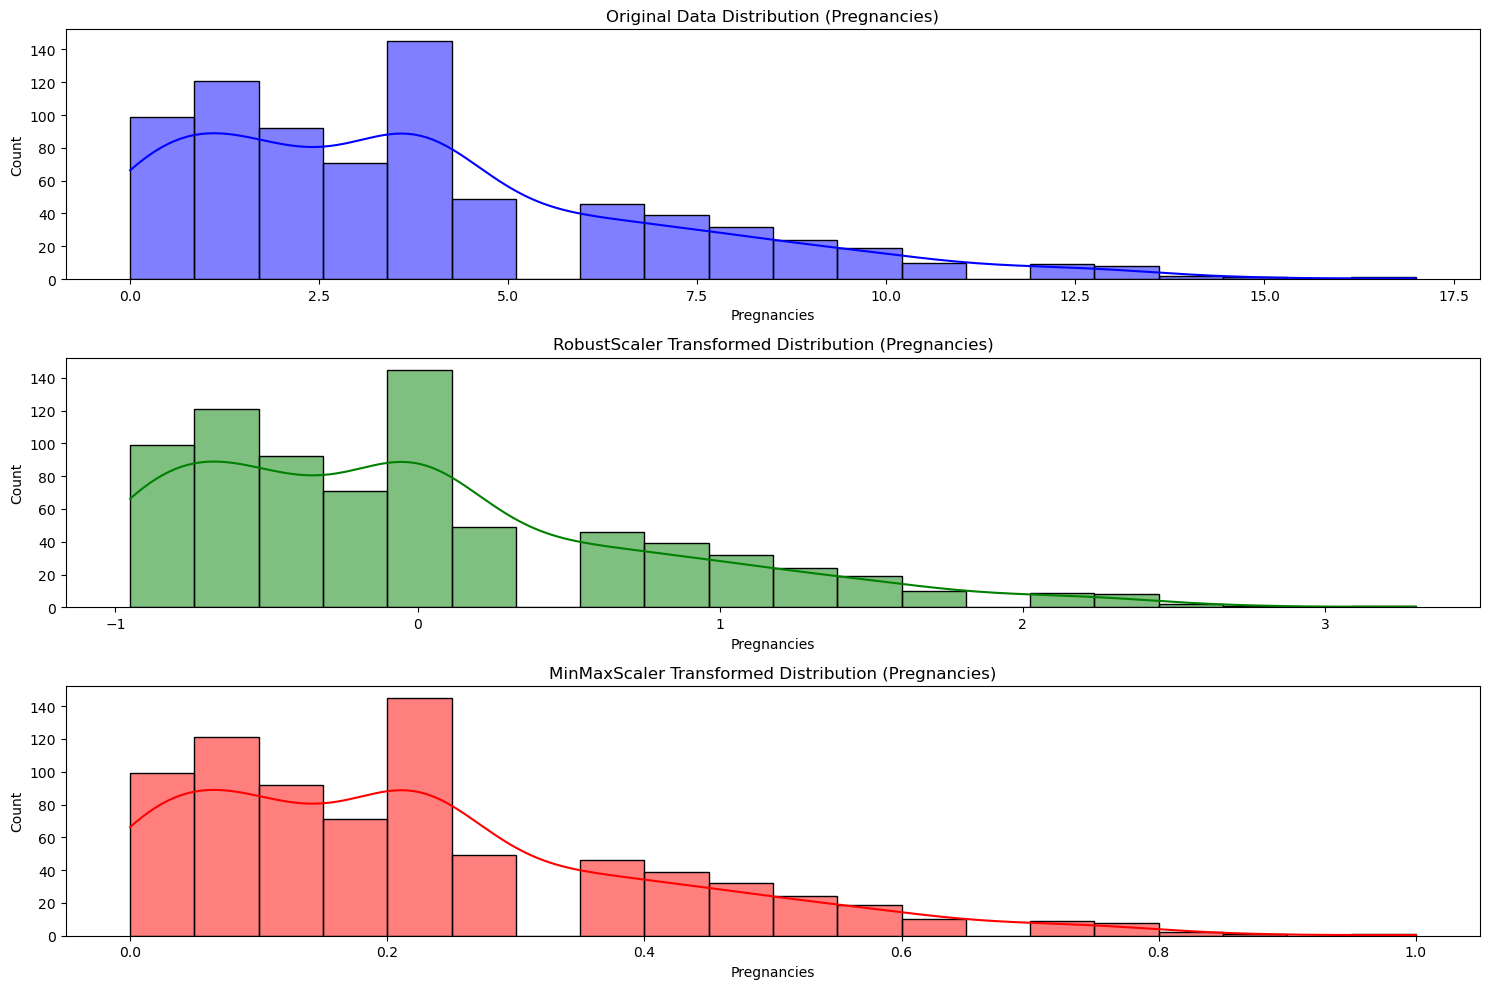

In [16]:
# Nomor 4
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'diabetes.csv'  # Adjust the file path as needed
diabetes_data = pd.read_csv(file_path)

diabetes_data.fillna(diabetes_data.mean(), inplace=True)

features = diabetes_data.drop(columns=['Outcome'])
target = diabetes_data['Outcome']

robust_scaler = RobustScaler()
features_robust_scaled = robust_scaler.fit_transform(features)

minmax_scaler = MinMaxScaler()
features_minmax_scaled = minmax_scaler.fit_transform(features)

features_robust_scaled_df = pd.DataFrame(features_robust_scaled, columns=features.columns)
features_minmax_scaled_df = pd.DataFrame(features_minmax_scaled, columns=features.columns)

plt.figure(figsize=(15,10))

plt.subplot(3, 1, 1)
sns.histplot(diabetes_data['Pregnancies'], kde=True, color='blue')
plt.title('Original Data Distribution (Pregnancies)')

plt.subplot(3, 1, 2)
sns.histplot(features_robust_scaled_df['Pregnancies'], kde=True, color='green')
plt.title('RobustScaler Transformed Distribution (Pregnancies)')

plt.subplot(3, 1, 3)
sns.histplot(features_minmax_scaled_df['Pregnancies'], kde=True, color='red')
plt.title('MinMaxScaler Transformed Distribution (Pregnancies)')

plt.tight_layout()
plt.show()

